In [116]:
%matplotlib inline

In [187]:
from random import shuffle
from itertools import chain
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm

/home/nickdg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [118]:
from IPython.display import display, HTML
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

## Load Data
Values were from 1 to 10, with 10 being highest.


Value Stream:
   1. Agree on date (18.10 @ 4pm)
     - Failure: no one shows up
   2. 2 people recruit PI for their event, get availability
     - Failure: get no options
   3. Meet, Pick Options
     - Failure: no likes the options
     - Failure: not enough available for PIs availability
   4. Schedule Event
     - Failure: PI cancels
   5. Advertise Event
     - Failure: low attendance

Max: 12 student attendees
Goal: 8+
Okay: 6-7
Failure Below: 1-5

Value Stream B:
   1. Get Availability of Group
     - Failure: low response reate
     - Failure: low accuracy
   2. person recruit PI for their event and schedules with them
     - Failure: get no options
   5. Advertise Event
     - Failure: low attendance

In [186]:
.66 * .05 * 12

0.396

Meeting: 66%
Event: ((66% + A%) * 66%) + (66% * 33%)

Enthusiasm Level (EL): ~66%
Meeting Attendance (M): EL
Cohesion Benefit (CO): -EL < CO < 1 - EL 
Meeting: EL
Event: ((EL + CO) * M) + (EL * (1 - M))
Event: EL * (CO + 1)

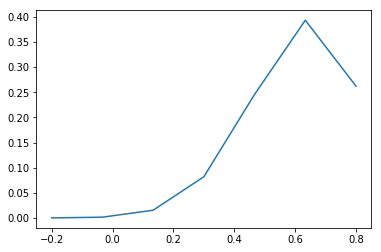

In [225]:
from scipy import stats

n_events = 6
x = arange(0, n_events + 1)
plot(x / n_events - 0.2, stats.binom(n_events, .8).pmf(x));

In [ ]:
enthusiasm = stats.binom

Value Stream C:
   2. person recruit PI for their event and schedules with them
     - Failure: get no options
   5. Advertise Event
     - Failure: low attendance

In [124]:
from pandas.core.strings import *

In [181]:
def max_linelen(seq):
    return [max([len(s) for s in el]) for el in str_split(seq, '\n')]

pd.Series.str.max_linelen = max_linelen

In [182]:
max_linelen(df.Liked)

[20, 35, 31, 60, 42, 47, 34, 67, 28, 28, 9]

In [180]:
df.Liked.str.max_linelen()

TypeError: object of type 'StringMethods' has no len()

In [164]:
df.Liked.str.max_linelen()

TypeError: object of type 'StringMethods' has no len()

In [158]:
df = pd.read_excel('lean_workshop_evaluations.xlsx')
df['Liked'] = df.Liked.str.replace(';', '\n')
df['Needs Improved'] = df['Needs Improved'].fillna('').str.replace(';', '\n')
df['LikedLen'
# pretty_print(df.sort_values('Valuable Topic'))

,Enjoyed,Valuable Topic,Engaged,Liked,Needs Improved
0,8.0,9,9,Personal Engagement\n New Topics/concepts,More examples how to add individual change\n l...
1,6.0,5,7,Personal experience and development\n stayed o...,more time for discussoins\n more personal expe...
2,3.0,3,10,Programming examples\n Open discussions\n effo...,shorten personal experience section\n more con...
3,3.0,4,4,the general idea was good but I was missing th...,"It would be good to be somewhat more specific,..."
4,5.5,8,4,"Practical part, teting stragies\n you were rea...",shorter introduction\n more practical engageme...
5,8.0,10,9,Personal experience story\n discussion section...,"Topics focus\n deeper, more detailed demos of ..."
6,8.0,6,8,Non-traditional conversation based,Less theory more application of the theory to ...
7,3.0,5,4,"Some parts were good topics for thought, parti...",Efficiency was low\n most of the time was you ...
8,5.5,8,4,input from unfamiliar topics\nnew input for th...,
9,8.0,5,6,Inspiration outside academic\n live session\n ...,more focus on main points\n less interactively...


In [153]:
str_split

<function pandas.core.strings.str_split(arr, pat=None, n=None)>

In [ ]:
def ljust_lines(ser):
    just_amt = str_split(ser, transform(lambda x: max(map(len, x))))
    

In [13]:
sns.regplot(data=df)

TypeError: regplot() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
np.rando

In [31]:
df_jitter = df.copy()
for col in df:
    try:
        df_jitter[col] += np.random.uniform(-0.5, 0.5, len(df[col]))
    except TypeError:
        pass

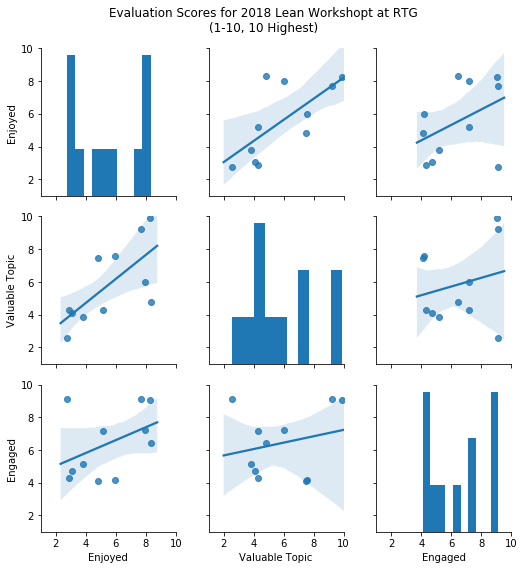

In [42]:
g = sns.pairplot(df_jitter, kind='reg');
g.fig.suptitle('Evaluation Scores for 2018 Lean Workshopt at RTG\n(1-10, 10 Highest)', y=1.05)
for ax in chain(*g.axes):
    ax.set(xlim=[1, 10], ylim=[1, 10], xticks=[2, 4, 6, 8, 10], yticks=[2, 4, 6, 8, 10])
g.fig.savefig('Lean_Workshop_EvalScores.png', tranparent=True, bbox_inches='tight')